# **군집 알고리즘(2) 붓꽃 데이터**

## K-means
  - 1) 데이터 로드

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸드링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


    - 2) KMeans 모델링

In [ ]:
# n_clusters = 3설정
km = KMeans(n_clusters=3, n_init='auto', max_iter=300, random_state=0)
km.fit(irisDF)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [ ]:
# labels_출력하기
print(km.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [ ]:
# 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지 군집화가 효과적으로 됐는지 확인해보기
irisDF['target'] = iris.target
irisDF['cluster'] = km.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       0          50
1       1           3
        2          47
2       1          36
        2          14
Name: sepal_length, dtype: int64


- 붓꽃 데이터 세트의 속성이 4개이므로 2차원 평면에 적합하지 않아 PCA를 이용해 4개의 속성을 2개로 차원축소한 뒤 X좌표, Y좌표로 개별 데이터를 표현

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2개로 차원축소
pca_transformed = pca.fit_transform(iris.data)
# 실제데이터와 차원축소된 2개의 feature와 거리 계산 = transform_

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949


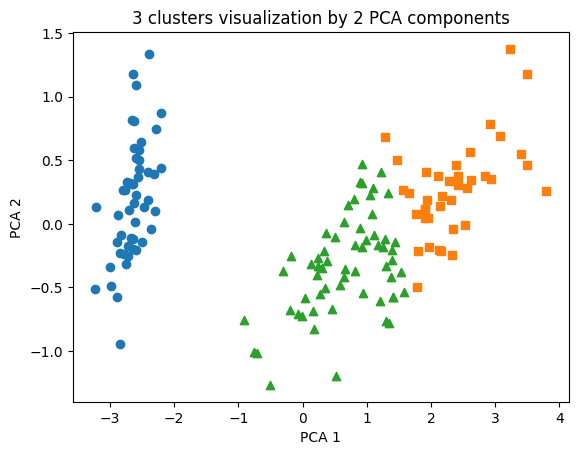

In [ ]:
# 군집값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출. o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters visualization by 2 PCA components')
plt.show()

## 군집 성능 평가 : Silhouette coefficient

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397,0.852582
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001,0.814916
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949,0.828797


In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.797604
1    0.436842
2    0.422323
Name: silhouette_coeff, dtype: float64

> 0번 군집은 실루엣 계수 평균값이 약 0.79인데 반해, 1.2번 군집은 상대적으로 낮다.
> 즉, 0번군집은 군집이 잘 이루어졌지만, 1,2번 군집은 상대적으로 잘 이루어지지 않음.

## 최적의 K 찾기

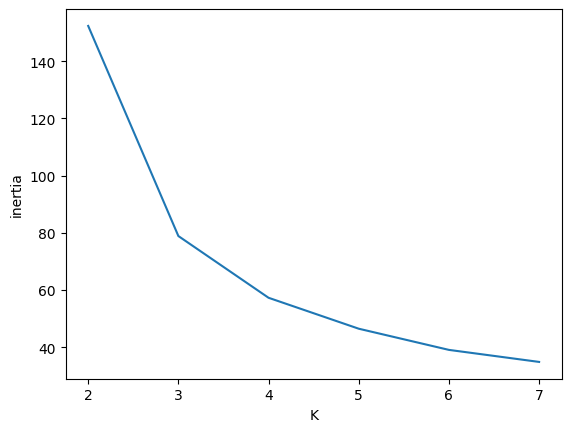

In [ ]:
inertia = []
for k in range(2,8):
    km = KMeans(n_clusters=k, n_init='auto',  random_state=42)
    km.fit(iris.data)
    inertia.append(km.inertia_)

plt.plot(range(2,8), inertia)
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()

> 실제 데이터와 클러스터 중심간의 거리의 제곱의 합 = inertia <br>
> inertia는 군집의 개수가 많아질수록 감소하지만, 어느 순간 정체된다. <br>
> 이 부분은 elbow_point라고 하며, 해당 k가 최적의 k라고 할 수 있다.

**궁금증 : silhouette coeffient와 inertia의 차이는 뭘까?**

실루엣 계수(Silhouette Coefficient)와 inertia는 모두 클러스터링 알고리즘에서 성능을 평가하는 데 사용되는 지표입니다. 하지만 둘은 서로 다른 측면을 측정하며 다른 목적을 가지고 있습니다.

실루엣 계수(Silhouette Coefficient):

실루엣 계수는 클러스터링 결과의 '타당성'을 측정하는 지표입니다. 각 데이터 포인트마다 클러스터 할당의 일관성과 클러스터 간의 분리 정도를 측정합니다.
값은 -1에서 1 사이의 범위를 가집니다.
값이 1에 가까울수록 클러스터링이 잘 된 것을 나타냅니다. 한편, 값이 -1에 가까울수록 클러스터링이 잘못된 것을 나타냅니다.
따라서 높은 실루엣 계수는 각 클러스터가 잘 정의되어 있고 서로 잘 분리되어 있음을 나타냅니다.


Inertia:

Inertia는 클러스터의 '응집도'를 측정하는 지표입니다. 클러스터 내의 데이터 포인트가 얼마나 밀집되어 있는지를 측정합니다.
클러스터 내의 데이터 포인트가 밀집하게 모여있을수록 inertia 값은 작아집니다.
클러스터의 개수가 증가함에 따라 inertia는 일반적으로 감소합니다. 이는 클러스터가 더 작은 크기로 분할될 때마다 각 클러스터의 응집도가 증가하므로 발생합니다.
inertia는 클러스터링 알고리즘이 특정 데이터셋을 얼마나 잘 그룹화하는지에 대한 척도로 사용됩니다. 클러스터링 알고리즘은 inertia를 최소화하는 방향으로 작동하여 클러스터 내의 응집도를 증가시키려고 합니다.
요약하면, 실루엣 계수는 클러스터링 결과의 일관성과 분리 정도를 측정하여 클러스터링의 '타당성'을 평가하고, inertia는 클러스터 내의 응집도를 측정하여 클러스터링 알고리즘이 얼마나 잘 작동하는지를 평가합니다.

*************

## DBSCAN

- 간단하고 직관적인 알고리즘으로 돼있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다.


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels_ = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels_
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


> -1은 노이즈에 속하는 군집을 의미.


> target 우형이 3가지 인데, 군집이 2개(0,1)가 됐다고 군집화 효율이 떨어진다는 의미는 아니다.

> DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미하다고 할 수 있다.

In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

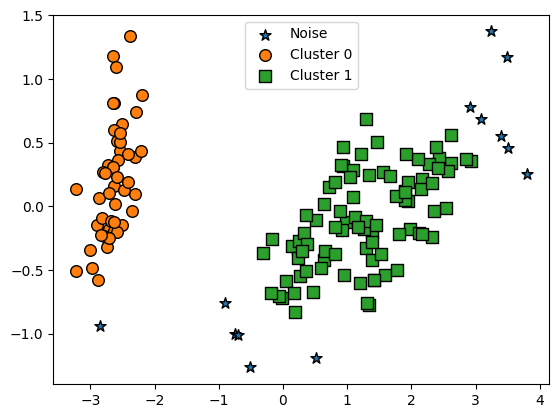

In [ ]:
from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 PCA n_components=2 로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

#visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

> eps 를 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아진다.

> min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 된다.데이터 밀도가 더 커져야 하는데, 매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식하기 때문.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


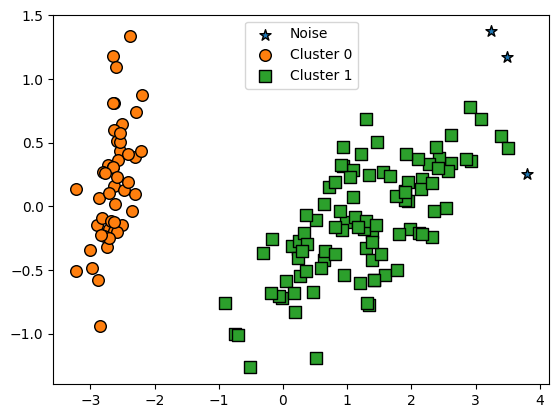

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels_ = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels_
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

> eps를 크게 했더니 반경이 커져 noise(-1) 감소.

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


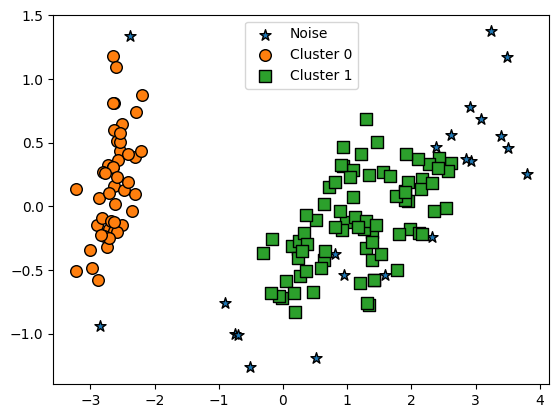

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels_ = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels_
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

> min_samples 를 크게 했더니 밀집도가 낮아지면서 noise(-1)가 증가했다.